# Using the wombats Wrapper for Minigrid Gym Environments

Change up to the main repo directory:

In [1]:
import os
os.chdir(os.path.join('..', '..'))

In [2]:
%load_ext autoreload
%autoreload 2
import gym
from IPython.display import Video

from wombats.automaton import Automaton
from wombats.systems import (StaticMinigridTSWrapper,
                             LavaComparison_noDryingOff)
from wombats.automaton import active_automata
from wombats.automaton import MinigridTransitionSystem
from wombats.utils import get_experiment_paths

# setting all paths
EXPERIMENT_NAME = 'MiniGrid_transition_system_modeling'

path_data = get_experiment_paths(EXPERIMENT_NAME)
EXPERIMENT_DIR = path_data['EXPERIMENT_DIR']
GYM_MONITOR_LOG_DIR = path_data['GYM_MONITOR_LOG_DIR']

# reset the kernel's Automata class' experimental directory for all created
# Automaton objects.
#
# If you autoreload any code having to do with the automaton, then you will
# need to re-run this cell to get the right automaton data path back, as the
# reload will reset the base Automaton class' automata_data_dir property
Automaton.automata_data_dir = os.path.join(EXPERIMENT_DIR)

## Creating the Environment

We start by creating a gym environment (can be wrapped):

In [3]:
# ENV_ID = 'MiniGrid-LavaComparison_noDryingOff-v0'
# ENV_ID = 'MiniGrid-AlternateLavaComparison_AllCorridorsOpen-v0'
ENV_ID = 'MiniGrid-DistShift1-v0'
# ENV_ID = 'MiniGrid-LavaGapS5-v0'

env = gym.make(ENV_ID)

Now that we have a regular Minigrid environment, we can wrap it with the wombats® minigrid wrapper to extract the abstraction of the environment.

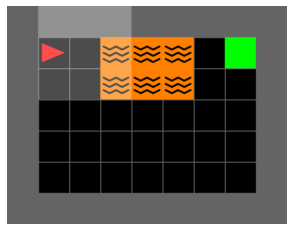

In [4]:
env = StaticMinigridTSWrapper(env, actions_type='static', 
                              monitor_log_location=GYM_MONITOR_LOG_DIR)
env.render_notebook()

## Creating the Transition System Representation

Now that we have wrapped the environemt in our wrapper, we can build a transition system out of the wrapped minigrid environment.

Note that the TS and the Minigrid environment will be kept in sync

In [5]:
minigrid_TS = active_automata.get(automaton_type='TS', graph_data=env,
                                  graph_data_format='minigrid')

Now that we created a transition system representation for the Minigrid env, we can visualize the underlying transition system. **WARNING: the transition system will be extremely large when drawn for most grid environments of any reasonable size.**

In [6]:
# minigrid_TS.draw('_'.join([EXPERIMENT_NAME, ENV_ID, 'TS']))

### Using the Transition System Representation

We can feed an environment action into the transition system and make the step in both the transition system and the gym environment:

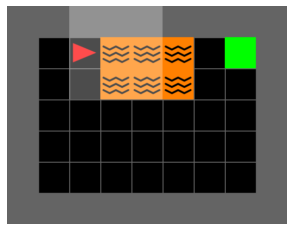

(2, 1), right empty_red_open


In [7]:
actions = minigrid_TS.actions
next_state, observation = minigrid_TS.transition(minigrid_TS.current_state,
                                                 input_symbol=actions.forward,
                                                 show_steps=True)
print(next_state, observation)

or we feed the TS one of its symbols and make a step in both the transition system and the gym environment:

In [8]:
minigrid_TS.symbols

{'forward', 'left', 'right'}

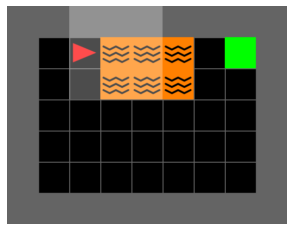

(2, 1), right empty_red_open


In [9]:
minigrid_TS.reset()
next_state, observation = minigrid_TS.transition(minigrid_TS.current_state,
                                                 input_symbol='forward',
                                                 show_steps=True)
print(next_state, observation)

We can also compute a run on the TS, again using either `env` actions or TS symbols, to compute an output string and the sequence of visited states:

In [10]:
controls = {}
controls['MiniGrid-LavaComparison_noDryingOff-v0'] = [actions.left,
                                                      actions.forward, 
                                                      actions.forward, 
                                                      actions.forward,
                                                      actions.forward,
                                                      actions.left,
                                                      actions.forward,
                                                      actions.forward]
controls['MiniGrid-DistShift1-v0'] = [actions.forward, actions.right, 
                                      actions.forward, actions.forward,
                                      actions.left, actions.forward,
                                      actions.forward, actions.forward,
                                      actions.forward, actions.left,
                                      actions.forward, actions.forward,
                                      actions.right, actions.forward]
controls['MiniGrid-LavaGapS5-v0'] = [actions.forward, actions.forward, 
                                     actions.right, actions.forward,
                                     actions.forward]

output_string, visited_states, video_path = minigrid_TS.run(controls[ENV_ID],
                                                            record_video=True)
print(output_string)
print(visited_states)
Video(video_path, embed=True, html_attributes="controls muted autoplay loop")

['empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'goal_green_open']
['(1, 1), right', '(2, 1), right', '(2, 1), down', '(2, 2), down', '(2, 3), down', '(2, 3), right', '(3, 3), right', '(4, 3), right', '(5, 3), right', '(6, 3), right', '(6, 3), up', '(6, 2), up', '(6, 1), up', '(6, 1), right', '(7, 1), right']
